In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import time
import numpy as np
from datetime import datetime  # Import for timestamps
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Conversion factor from INR to EUR
INR_TO_EUR = 0.0111

class ModelTrainer:
    def __init__(self, model_name):
        self.model_name = model_name
        self.training_times = []
        self.metrics = {
            'mae': [],
            'mse': [],
            'rmse': [],
            'r2': []
        }
        self.feature_importance = None
        self.predictions = None
        
    def train_and_evaluate(self, model, X_train, X_test, y_train, y_test):
        # Print start message with timestamp
        print(f"[{datetime.now().strftime('%H:%M:%S')}] Starting training for {self.model_name}...")
        
        # Record training time
        start_time = time.time()
        model.fit(X_train, y_train)
        training_time = time.time() - start_time
        self.training_times.append(training_time)
        
        # Print completion message with timestamp
        print(f"[{datetime.now().strftime('%H:%M:%S')}] Training completed for {self.model_name} in {training_time:.2f} seconds.")
        
        # Make predictions
        print(f"[{datetime.now().strftime('%H:%M:%S')}] Making predictions for {self.model_name}...")
        self.predictions = model.predict(X_test)
        
        # Calculate metrics
        print(f"[{datetime.now().strftime('%H:%M:%S')}] Calculating metrics for {self.model_name}...")
        self.metrics['mae'].append(mean_absolute_error(y_test, self.predictions))
        self.metrics['mse'].append(mean_squared_error(y_test, self.predictions))
        self.metrics['rmse'].append(np.sqrt(mean_squared_error(y_test, self.predictions)))
        self.metrics['r2'].append(r2_score(y_test, self.predictions))
        
        # Save feature importance if available
        if hasattr(model, 'feature_importances_'):
            self.feature_importance = model.feature_importances_
            print(f"[{datetime.now().strftime('%H:%M:%S')}] Feature importance calculated for {self.model_name}.")
            
        return self.metrics, self.predictions
        
    def plot_feature_importance(self, feature_names=None):
        if self.feature_importance is not None:
            if feature_names is None:
                # Use feature indices if no names are provided
                feature_names = [f'Feature {i}' for i in range(len(self.feature_importance))]
            
            plt.figure(figsize=(10, 6))
            importances = pd.Series(self.feature_importance, index=feature_names)
            importances.sort_values().plot(kind='barh')
            plt.title(f'Importância das Features - {self.model_name}')
            plt.show()
    
    def plot_predictions_vs_actual(self, y_test):
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, self.predictions, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        plt.xlabel('Valores Reais (EUR)')
        plt.ylabel('Previsões (EUR)')
        plt.title(f'Previsões vs Valores Reais - {self.model_name}')
        plt.show()
    
    def plot_residuals(self, y_test):
        residuals = y_test - self.predictions
        plt.figure(figsize=(10, 6))
        plt.hist(residuals, bins=50)
        plt.xlabel('Resíduos (EUR)')
        plt.ylabel('Frequência')
        plt.title(f'Distribuição dos Resíduos - {self.model_name}')
        plt.show()

--- Processing Model: Linear Regression ---
[18:56:34] Starting training for Linear Regression...
[18:56:35] Training completed for Linear Regression in 1.31 seconds.
[18:56:35] Making predictions for Linear Regression...
[18:56:35] Calculating metrics for Linear Regression...


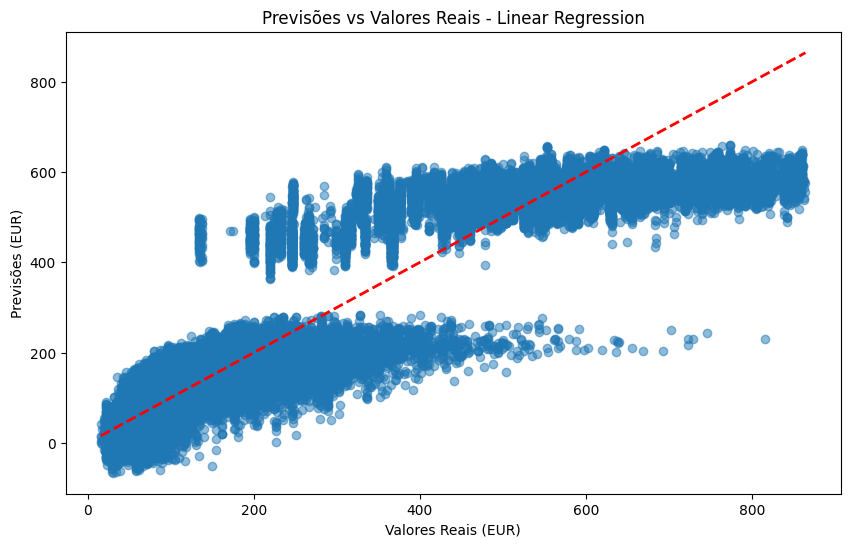

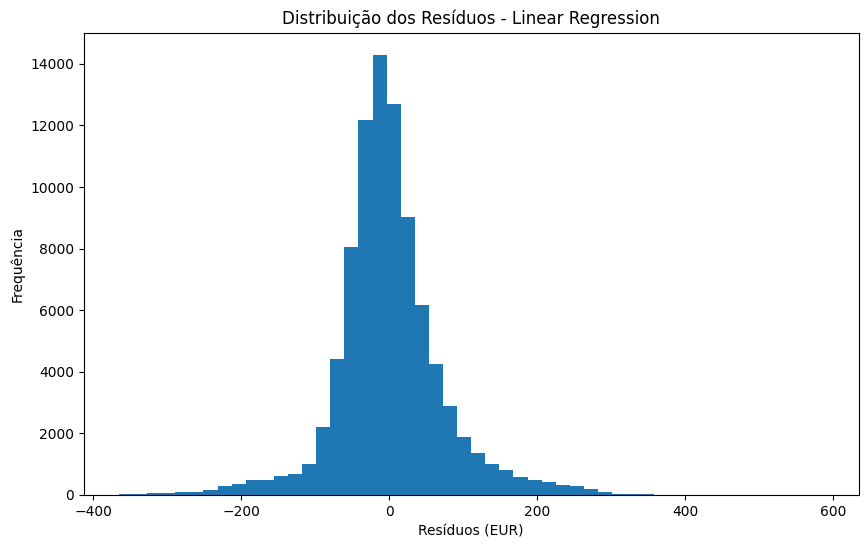

--- Processing Model: Random Forest ---
[18:56:36] Starting training for Random Forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 15.7min


building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 43.8min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


[19:40:25] Training completed for Random Forest in 2628.92 seconds.
[19:40:25] Making predictions for Random Forest...


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.5s finished


[19:40:27] Calculating metrics for Random Forest...


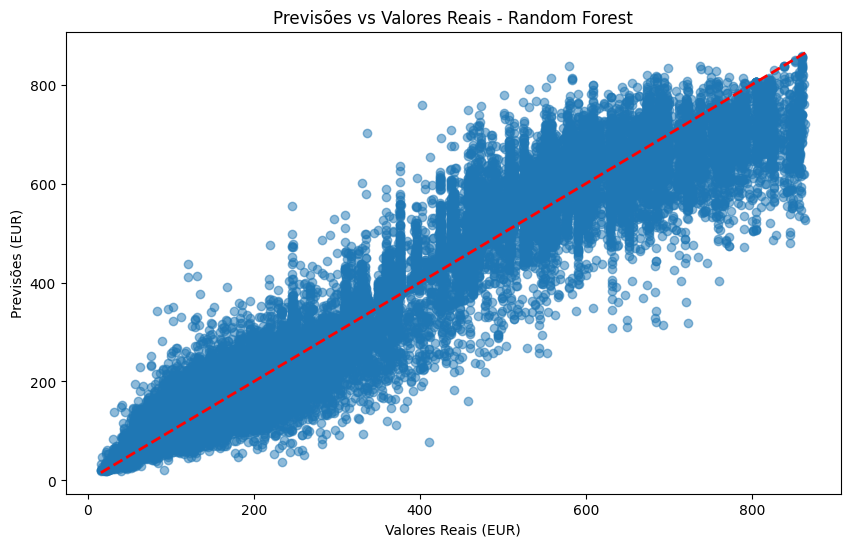

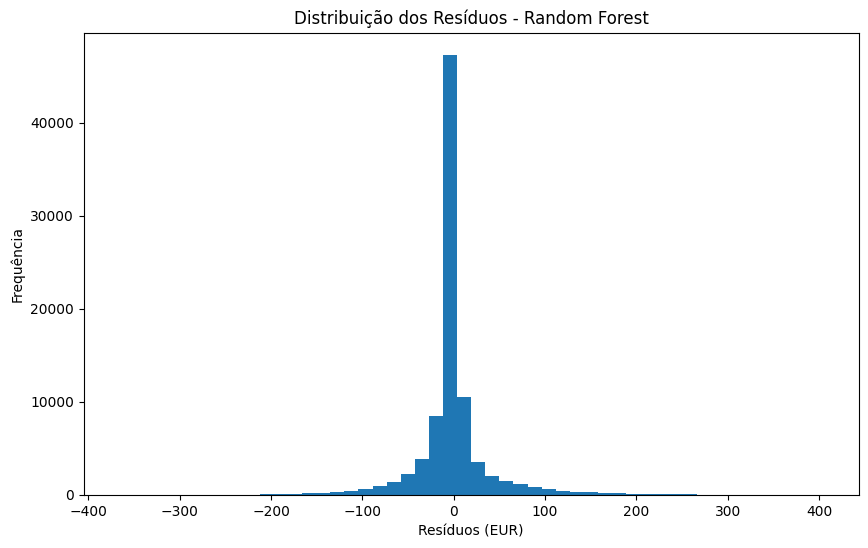

--- Processing Model: XGBoost ---
[19:40:27] Starting training for XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


[19:40:29] Training completed for XGBoost in 1.71 seconds.
[19:40:29] Making predictions for XGBoost...
[19:40:29] Calculating metrics for XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:40:29] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


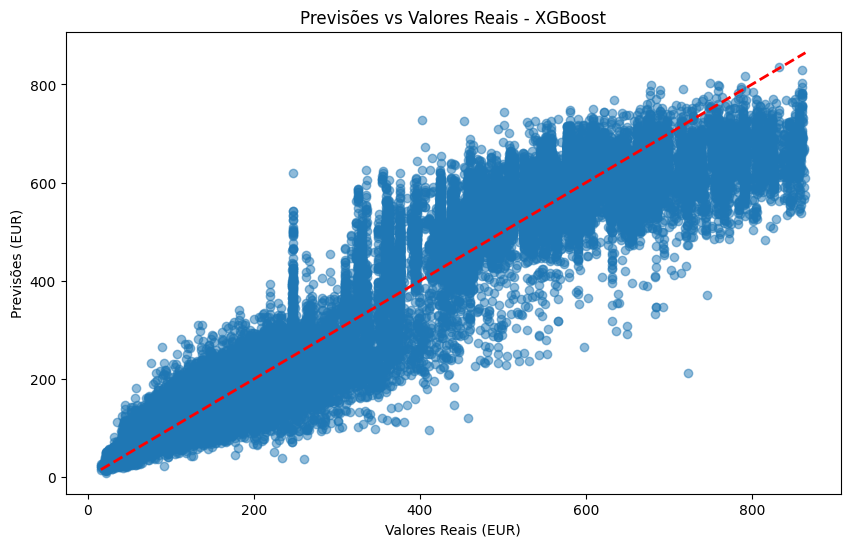

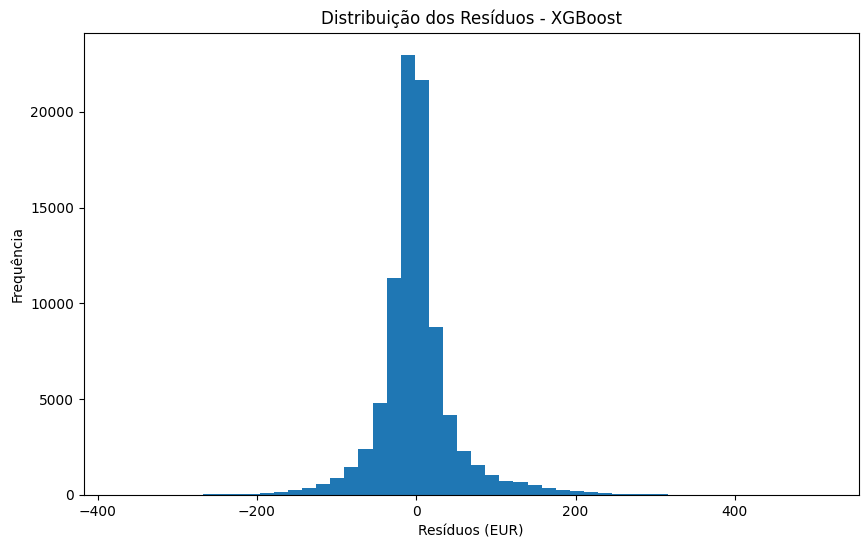


Comparação de Métricas entre Modelos:
                   MAE (EUR)    MSE (EUR)  RMSE (EUR)        R²
Linear Regression  50.081448  5203.438904   72.134866  0.878267
Random Forest      20.217061  1561.351143   39.513936  0.963473
XGBoost            30.363174  2318.895552   48.154912  0.945750


<Figure size 1200x600 with 0 Axes>

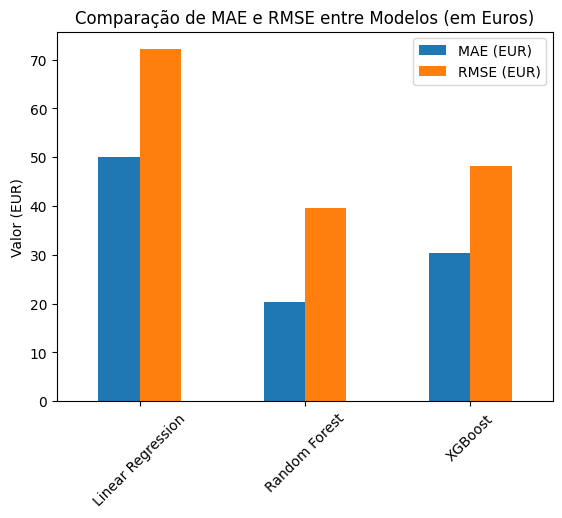

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from scipy.stats import zscore

# Load the dataset
data = pd.read_csv('/kaggle/input/dataset-avaliador/Cleaned_dataset.csv')

# Convert Fare from INR to EUR
data['Fare'] = data['Fare'] * INR_TO_EUR

# Drop unnecessary columns
data.drop(columns=['Date_of_journey', 'Flight_code'], inplace=True)

# Separate categorical and numerical features
categorical_features = ['Journey_day', 'Airline', 'Class', 'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination']
numerical_features = ['Duration_in_hours', 'Days_left', 'Fare']

# Remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply outlier removal to numerical features
data = remove_outliers_iqr(data, numerical_features)

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features[:-1]),  # Exclude 'Fare' from scaling
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Split the data into features (X) and target (y)
X = data.drop(columns=['Fare'])
y = data['Fare']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models to train
models = {
    'Linear Regression': Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearRegression())]),
    'Random Forest': Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1,
        verbose=2
    ))]),
    'XGBoost': Pipeline(steps=[('preprocessor', preprocessor), ('model', xgb.XGBRegressor(
        n_estimators=100,
        random_state=42,
        tree_method='hist',  # Use histogram-based method
        device='cuda',       # Enable GPU acceleration
        predictor='gpu_predictor',  # Use GPU for prediction
        verbosity=2          # Enable verbose output for XGBoost
    ))])
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"--- Processing Model: {name} ---")
    trainer = ModelTrainer(name)
    metrics, predictions = trainer.train_and_evaluate(model, X_train, X_test, y_train, y_test)
    results[name] = {
        'metrics': metrics,
        'predictions': predictions,
        'trainer': trainer
    }
    
    # Plot graphs
    trainer.plot_predictions_vs_actual(y_test)
    trainer.plot_residuals(y_test)

# Compare metrics between models
metrics_comparison = pd.DataFrame({
    name: {
        'MAE (EUR)': results[name]['metrics']['mae'][-1],
        'MSE (EUR)': results[name]['metrics']['mse'][-1],
        'RMSE (EUR)': results[name]['metrics']['rmse'][-1],
        'R²': results[name]['metrics']['r2'][-1]
    } for name in models.keys()
}).T

print("\nComparação de Métricas entre Modelos:")
print(metrics_comparison)

# Plot metric comparison
plt.figure(figsize=(12, 6))
metrics_comparison[['MAE (EUR)', 'RMSE (EUR)']].plot(kind='bar')
plt.title('Comparação de MAE e RMSE entre Modelos (em Euros)')
plt.ylabel('Valor (EUR)')
plt.xticks(rotation=45)
plt.show()